**Loading the Data and Checking Data Types**

Before plotting, the first step is to load our data into a pandas
DataFrame and check the data types. This helps ensure that all the columns, especially the date/time column, are in the correct format.

In [2]:
import pandas as pd

# Load the dataset from a CSV file (replace with your actual file path)
data_path = '/content/cycling_data_with_ftp.csv'
df = pd.read_csv(data_path)

# Display the first few rows to verify the data
print(df.head())

   Activity ID          Activity Date Activity Name Activity Type  \
0   2929442069  13 Dec 2019, 01:46:07    Lunch Ride          Ride   
1   2945780637  20 Dec 2019, 23:05:01  Morning Ride          Ride   
2   2948028275  21 Dec 2019, 23:25:29  Morning Ride          Ride   
3   2952462113  24 Dec 2019, 01:19:17    Lunch Ride          Ride   
4   2956494096  26 Dec 2019, 00:09:08    Lunch Ride          Ride   

   Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
0          3859     22.97           139.0             11.0    False   
1          4852     29.65           133.0             12.0    False   
2          5817     32.38           139.0             19.0    False   
3          3851     21.68           140.0             11.0    False   
4          5843     32.36           131.0             14.0    False   

   Athlete Weight  ...  Maximum Power 30s  Maximum Power 1.0min  \
0            84.0  ...              342.1                 221.2   
1            84.0  ...  

**Convert Activity Date to Datetime**

When working with time series data, it's crucial for the time component to be in a format that pandas understands as date and time. By default, columns in a CSV file are read as strings (text).

Converting the Activity Date to a datetime object ensures that pandas recognizes it as time-based data rather than just text. This enables pandas to sort, filter, and plot the data based on actual dates, rather than treating them like plain text.

In [3]:
# Convert 'Activity Date' to a datetime object
df['Activity Date'] = pd.to_datetime(df['Activity Date'])
# Verify that the conversion worked
print(df['Activity Date'].head())

0   2019-12-13 01:46:07
1   2019-12-20 23:05:01
2   2019-12-21 23:25:29
3   2019-12-24 01:19:17
4   2019-12-26 00:09:08
Name: Activity Date, dtype: datetime64[ns]


**Set Activity Date as the Index**

In [4]:
# Set 'Activity Date' as the index
df.set_index('Activity Date', inplace=True)

# Verify that 'Activity Date' is now the index
print(df.head())

                     Activity ID Activity Name Activity Type  Elapsed Time  \
Activity Date                                                                
2019-12-13 01:46:07   2929442069    Lunch Ride          Ride          3859   
2019-12-20 23:05:01   2945780637  Morning Ride          Ride          4852   
2019-12-21 23:25:29   2948028275  Morning Ride          Ride          5817   
2019-12-24 01:19:17   2952462113    Lunch Ride          Ride          3851   
2019-12-26 00:09:08   2956494096    Lunch Ride          Ride          5843   

                     Distance  Max Heart Rate  Relative Effort  Commute  \
Activity Date                                                             
2019-12-13 01:46:07     22.97           139.0             11.0    False   
2019-12-20 23:05:01     29.65           133.0             12.0    False   
2019-12-21 23:25:29     32.38           139.0             19.0    False   
2019-12-24 01:19:17     21.68           140.0             11.0    False   
201

**Create the Time Series Plot**

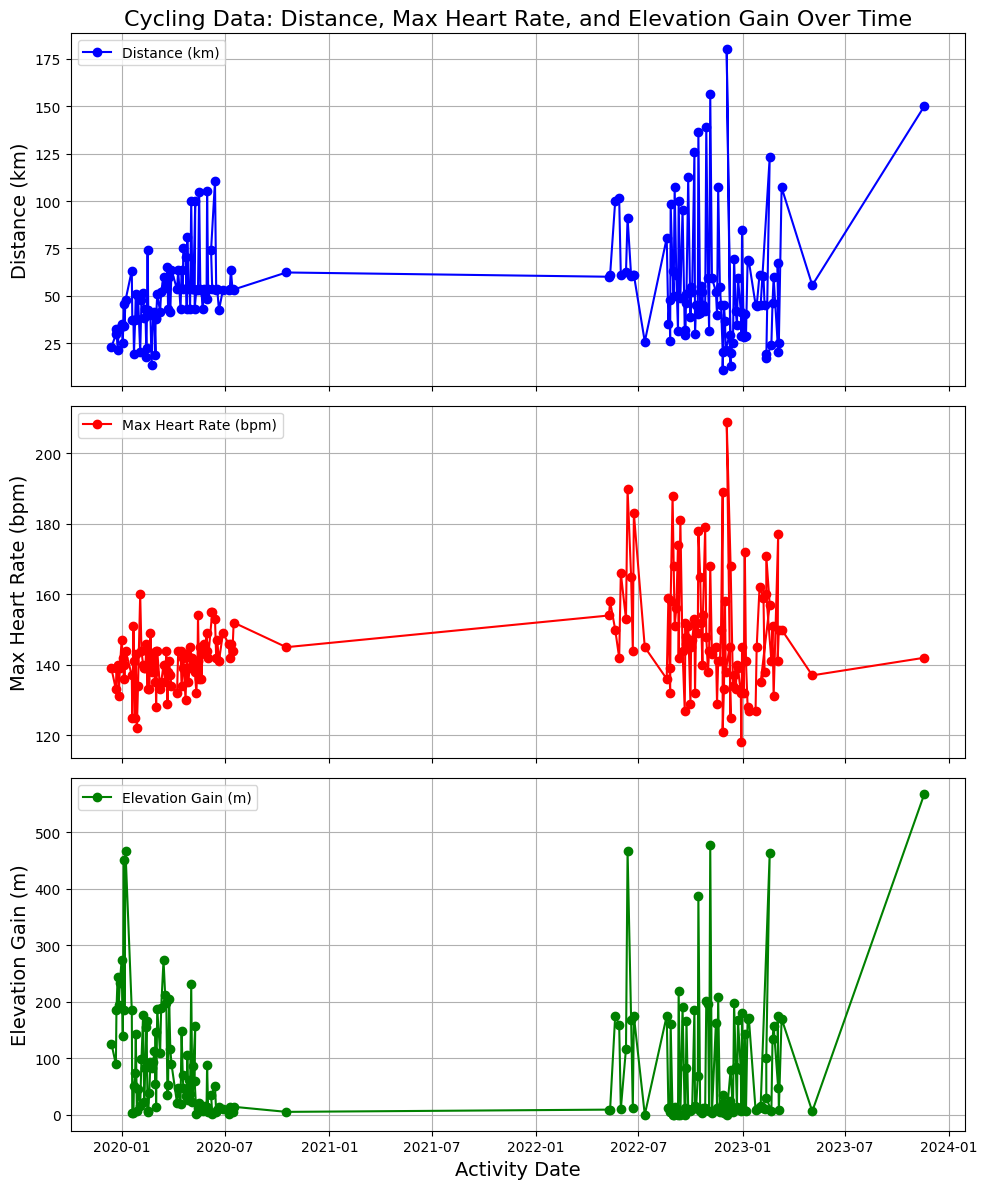

In [5]:
import matplotlib.pyplot as plt

# Create subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot Distance on the first subplot
axes[0].plot(df.index, df['Distance'], color='b', marker='o', label='Distance (km)')
axes[0].set_ylabel('Distance (km)', fontsize=14)
axes[0].set_title('Cycling Data: Distance, Max Heart Rate, and Elevation Gain Over Time', fontsize=16)
axes[0].legend(loc='upper left')
axes[0].grid(True)

# Plot Max Heart Rate on the second subplot
axes[1].plot(df.index, df['Max Heart Rate'], color='r', marker='o', label='Max Heart Rate (bpm)')
axes[1].set_ylabel('Max Heart Rate (bpm)', fontsize=14)
axes[1].legend(loc='upper left')
axes[1].grid(True)

# Plot Elevation Gain on the third subplot
axes[2].plot(df.index, df['Elevation Gain'], color='g', marker='o', label='Elevation Gain (m)')
axes[2].set_xlabel('Activity Date', fontsize=14)
axes[2].set_ylabel('Elevation Gain (m)', fontsize=14)
axes[2].legend(loc='upper left')
axes[2].grid(True)

# Adjust the layout so the plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

X-Axis (Time): Represents time intervals. This is where the data points are plotted.

Y-Axis (Values): Represents the values of the metrics you’re plotting (e.g., Distance, Max Heart Rate, Elevation Gain).

Lines/Curves: Different lines or curves represent different metrics on the same graph. Each line corresponds to a metric and shows its variation over time.

Legends: Indicates which line corresponds to which metric. It helps in identifying and distinguishing between different lines.

**Correlation Analysis**

In [9]:
correlation = df[['Distance', 'Max Heart Rate', 'Elevation Gain']].corr()
print(correlation)

                Distance  Max Heart Rate  Elevation Gain
Distance        1.000000        0.260067        0.426221
Max Heart Rate  0.260067        1.000000        0.073723
Elevation Gain  0.426221        0.073723        1.000000


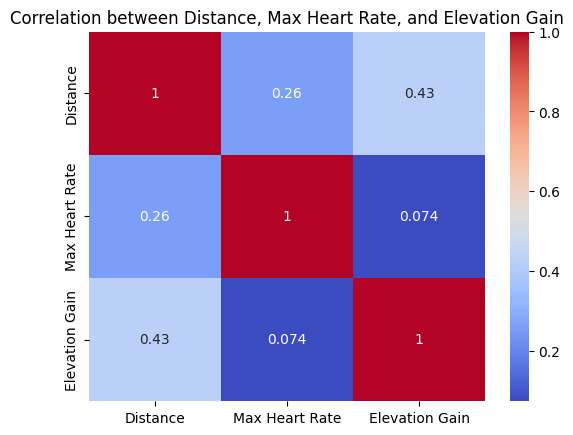

In [10]:
import seaborn as sns

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Distance, Max Heart Rate, and Elevation Gain')
plt.show()

**Interpret Correlations:**

High Positive Correlation (close to 1): Indicates that as one variable increases, the other variable also tends to increase.

High Negative Correlation (close to -1): Indicates that as one variable increases, the other variable tends to decrease.

Low or Zero Correlation: Indicates little to no linear relationship between the variables.

 A table can provide a detailed view of data, showing metrics for specific time periods.

In [13]:
# Assuming df is DataFrame with 'Activity Date' as the index
summary_table = df[['Distance', 'Max Heart Rate', 'Elevation Gain']].resample('M').mean()

print(summary_table.head())
print(statistics_table)

                Distance  Max Heart Rate  Elevation Gain
Activity Date                                           
2019-12-31     29.551429      138.285714      192.428571
2020-01-31     40.530833      136.666667      146.037085
2020-02-29     36.941250      141.812500       84.312500
2020-03-31     52.258333      136.500000      139.833333
2020-04-30     58.135833      138.833333       54.416667
         Distance  Max Heart Rate  Elevation Gain
count  181.000000      181.000000      181.000000
mean    54.417569      145.154696       85.366937
std     28.127591       13.875572      107.415028
min     10.960000      118.000000        0.000000
25%     38.110000      137.000000       10.000000
50%     50.890000      143.000000       34.799988
75%     60.970000      150.000000      157.000000
max    180.080000      209.000000      567.370667


Highlight Key Insights

In [14]:
# Example of adding an 'Outlier' column based on some condition
df['Outlier'] = df['Max Heart Rate'] > df['Max Heart Rate'].quantile(0.95)
print(df[['Distance', 'Max Heart Rate', 'Elevation Gain', 'Outlier']].head())

                     Distance  Max Heart Rate  Elevation Gain  Outlier
Activity Date                                                         
2019-12-13 01:46:07     22.97           139.0           126.0    False
2019-12-20 23:05:01     29.65           133.0            89.0    False
2019-12-21 23:25:29     32.38           139.0           186.0    False
2019-12-24 01:19:17     21.68           140.0           244.0    False
2019-12-26 00:09:08     32.36           131.0           195.0    False


**Calculating Rolling Statistics**

                     Distance  Rolling Mean Distance  Rolling Std Distance  \
Activity Date                                                                
2019-12-13 01:46:07     22.97                    NaN                   NaN   
2019-12-20 23:05:01     29.65                    NaN                   NaN   
2019-12-21 23:25:29     32.38                    NaN                   NaN   
2019-12-24 01:19:17     21.68                    NaN                   NaN   
2019-12-26 00:09:08     32.36                    NaN                   NaN   
2019-12-27 23:38:08     32.84                    NaN                   NaN   
2019-12-31 01:48:12     34.98                    NaN                   NaN   
2020-01-02 03:43:00     25.22                    NaN                   NaN   
2020-01-03 23:27:55     45.79                    NaN                   NaN   
2020-01-05 01:30:44     34.01                    NaN                   NaN   
2020-01-06 23:16:34     47.69                    NaN            

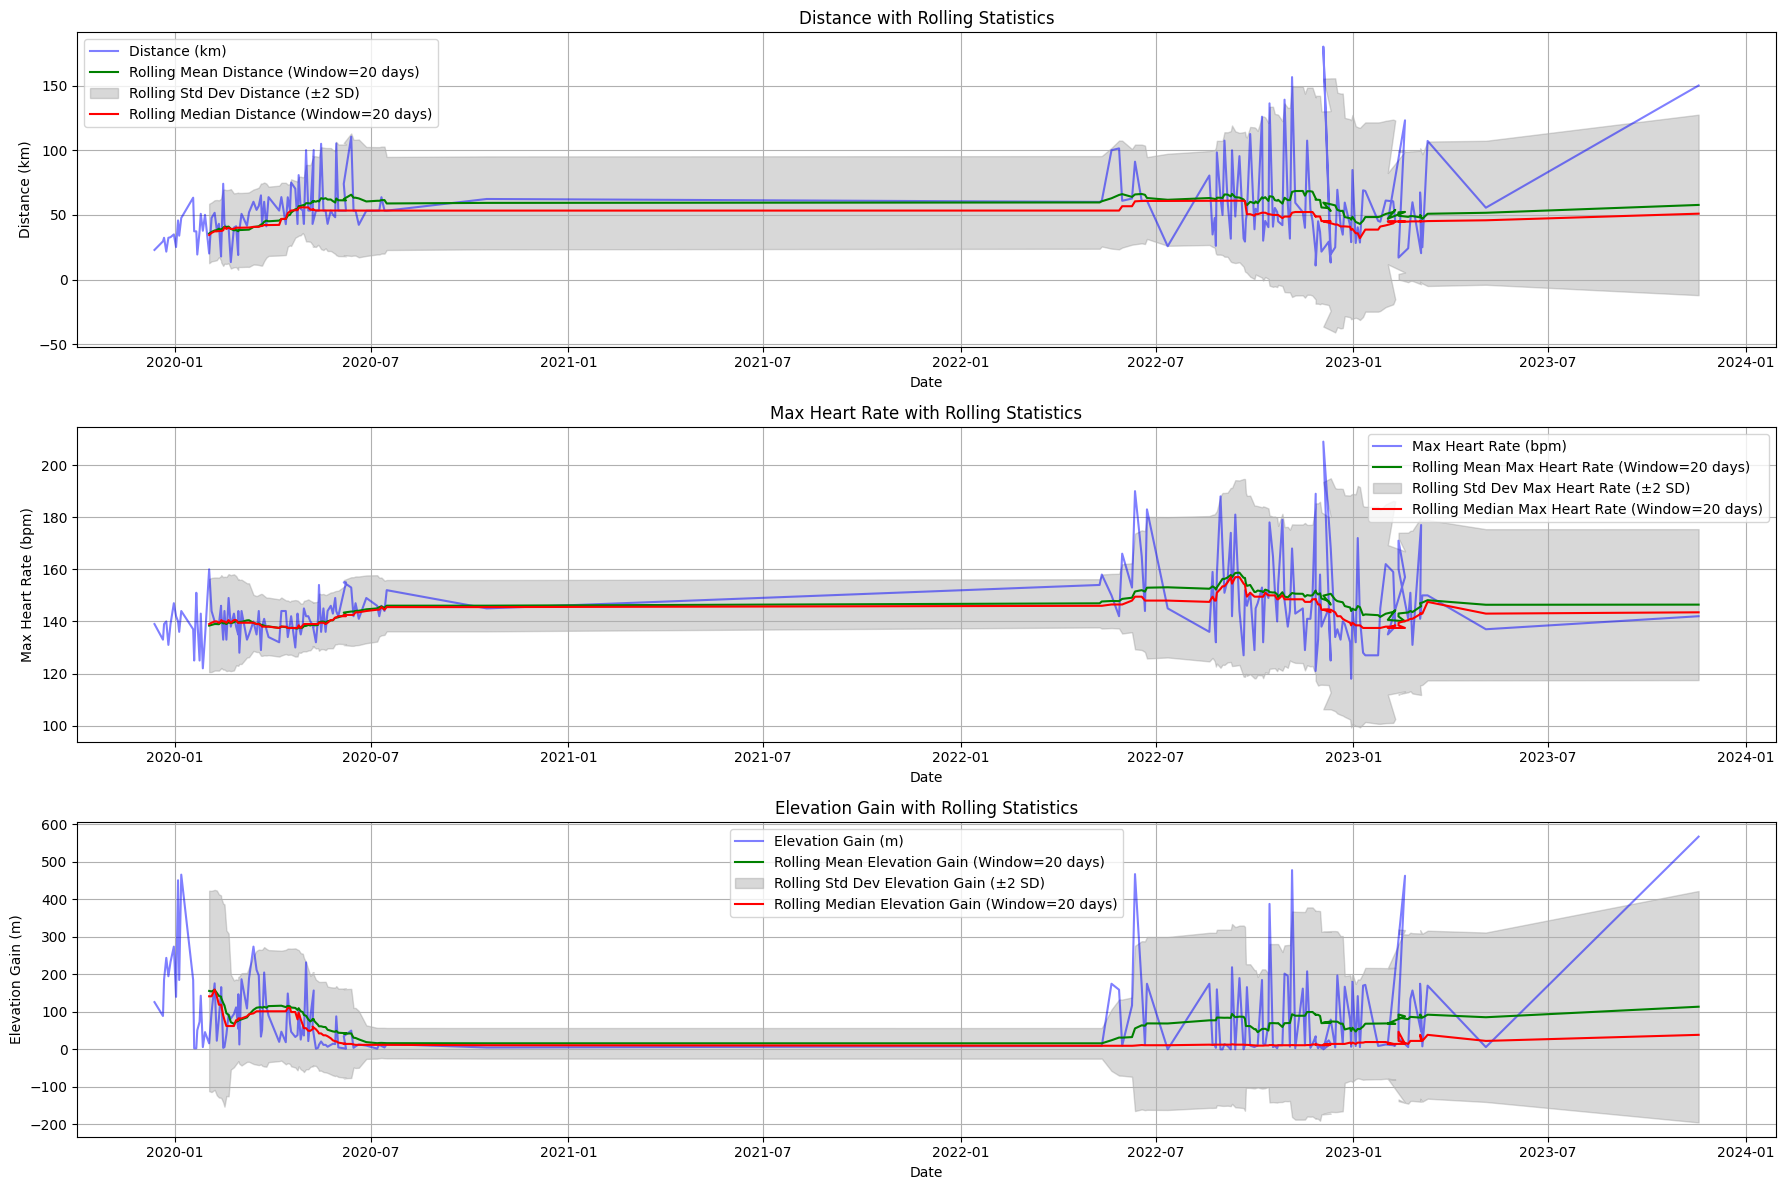

In [19]:
# Define the rolling window size (e.g., 30 days)
window_size = 20

# Calculate rolling statistics for Distance
df['Rolling Mean Distance'] = df['Distance'].rolling(window=window_size).mean()
df['Rolling Std Distance'] = df['Distance'].rolling(window=window_size).std()
df['Rolling Median Distance'] = df['Distance'].rolling(window=window_size).median()

# Calculate rolling statistics for Max Heart Rate
df['Rolling Mean Max Heart Rate'] = df['Max Heart Rate'].rolling(window=window_size).mean()
df['Rolling Std Max Heart Rate'] = df['Max Heart Rate'].rolling(window=window_size).std()
df['Rolling Median Max Heart Rate'] = df['Max Heart Rate'].rolling(window=window_size).median()

# Calculate rolling statistics for Elevation Gain
df['Rolling Mean Elevation Gain'] = df['Elevation Gain'].rolling(window=window_size).mean()
df['Rolling Std Elevation Gain'] = df['Elevation Gain'].rolling(window=window_size).std()
df['Rolling Median Elevation Gain'] = df['Elevation Gain'].rolling(window=window_size).median()

# Display the first few rows of the DataFrame with rolling statistics
print(df[['Distance', 'Rolling Mean Distance', 'Rolling Std Distance', 'Rolling Median Distance',
          'Max Heart Rate', 'Rolling Mean Max Heart Rate', 'Rolling Std Max Heart Rate', 'Rolling Median Max Heart Rate',
          'Elevation Gain', 'Rolling Mean Elevation Gain', 'Rolling Std Elevation Gain', 'Rolling Median Elevation Gain']].head(40))

# Optionally, export to CSV for sharing
df[['Distance', 'Rolling Mean Distance', 'Rolling Std Distance', 'Rolling Median Distance',
    'Max Heart Rate', 'Rolling Mean Max Heart Rate', 'Rolling Std Max Heart Rate', 'Rolling Median Max Heart Rate',
    'Elevation Gain', 'Rolling Mean Elevation Gain', 'Rolling Std Elevation Gain', 'Rolling Median Elevation Gain']].to_csv('rolling_statistics.csv')

# Plotting the time series with rolling statistics for all variables
plt.figure(figsize=(18, 12))

# Plot Distance with rolling statistics
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Distance'], label='Distance (km)', color='blue', alpha=0.5)
plt.plot(df.index, df['Rolling Mean Distance'], label=f'Rolling Mean Distance (Window={window_size} days)', color='green')
plt.fill_between(df.index, df['Rolling Mean Distance'] - 2*df['Rolling Std Distance'],
                 df['Rolling Mean Distance'] + 2*df['Rolling Std Distance'], color='gray', alpha=0.3, label='Rolling Std Dev Distance (±2 SD)')
plt.plot(df.index, df['Rolling Median Distance'], label=f'Rolling Median Distance (Window={window_size} days)', color='red')
plt.title('Distance with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Distance (km)')
plt.legend()
plt.grid(True)

# Plot Max Heart Rate with rolling statistics
plt.subplot(3, 1, 2)
plt.plot(df.index, df['Max Heart Rate'], label='Max Heart Rate (bpm)', color='blue', alpha=0.5)
plt.plot(df.index, df['Rolling Mean Max Heart Rate'], label=f'Rolling Mean Max Heart Rate (Window={window_size} days)', color='green')
plt.fill_between(df.index, df['Rolling Mean Max Heart Rate'] - 2*df['Rolling Std Max Heart Rate'],
                 df['Rolling Mean Max Heart Rate'] + 2*df['Rolling Std Max Heart Rate'], color='gray', alpha=0.3, label='Rolling Std Dev Max Heart Rate (±2 SD)')
plt.plot(df.index, df['Rolling Median Max Heart Rate'], label=f'Rolling Median Max Heart Rate (Window={window_size} days)', color='red')
plt.title('Max Heart Rate with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Max Heart Rate (bpm)')
plt.legend()
plt.grid(True)

# Plot Elevation Gain with rolling statistics
plt.subplot(3, 1, 3)
plt.plot(df.index, df['Elevation Gain'], label='Elevation Gain (m)', color='blue', alpha=0.5)
plt.plot(df.index, df['Rolling Mean Elevation Gain'], label=f'Rolling Mean Elevation Gain (Window={window_size} days)', color='green')
plt.fill_between(df.index, df['Rolling Mean Elevation Gain'] - 2*df['Rolling Std Elevation Gain'],
                 df['Rolling Mean Elevation Gain'] + 2*df['Rolling Std Elevation Gain'], color='gray', alpha=0.3, label='Rolling Std Dev Elevation Gain (±2 SD)')
plt.plot(df.index, df['Rolling Median Elevation Gain'], label=f'Rolling Median Elevation Gain (Window={window_size} days)', color='red')
plt.title('Elevation Gain with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Elevation Gain (m)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Rolling Mean: Smooths the data over a specified window.

Rolling Std Dev: Shows variability around the rolling mean.

Rolling Median: Provides a robust central measure.

Based on the rolling statistics:

Distance: Both the rolling mean and median distance show an increasing trend over time, indicating that the average and typical distances covered in activities are rising.

Heart Rate: The rolling mean heart rate fluctuates without a clear trend, while the rolling median heart rate remains relatively stable. The variability in heart rate shows periods of inconsistency.

Max Heart Rate: There is a general upward trend in the rolling mean max heart rate, suggesting increased peak heart rates over time, with variability showing some fluctuations.

Elevation Gain: Both the rolling mean and median elevation gain are increasing, indicating more elevation gain in activities over time, with variability in elevation gain also fluctuating.

Overall, the data suggests that activities are becoming more demanding in terms of distance and elevation, with increased peak heart rates and some variability in heart rate and elevation gain.